In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Лабораторная работа №1.3.3
Тема: **Определение взякости воздуха по скорости течения через тонкие трубки**

Обработка:
- (5) зависимость dP от Q
- (6) определить угловой коэф-т
- (7) Re для переходной области
- (8) зависимость P от l
- (9) зависимость $\frac{8lnQ}{\pi \Delta P} = r^n$ в двойном логарифмическом масштабе и угловой коэф-т

## Подготовка

In [2]:
rho = 1.2047 # кг/см^3
rho_sp = 0.806 # кг/см^3
rad1, rad2 = 0.001, 0.002 # м
temp = 23 # °C
Δtime1, Δtime2 = 17.2, 13.7 # сек

In [3]:
π = 3.14159265

def shrink_error(num):
	i = 0
	while float('{:.{prec:d}f}'.format(num, prec=i)) / num < 0.8: i += 1
	return '{:.{prec:d}f}'.format(num, prec=i), i

def fmt(num, error):
	error, digits = shrink_error(error)
	return '{:.{prec:d}f}±{:s}'.format(num, error, prec=digits)

def lsm(x, y):
    if x.size != y.size: raise LogicError

    # f(x) = a + bx
    b = ((x * y).mean() - x.mean() * y.mean()) / ((x**2).mean() - x.mean()**2)
    a = y.mean() - b * x.mean()
    
    sigma_b = 1 / x.size**0.5 * (((y**2).mean() - y.mean()**2) / ((x**2).mean() - x.mean()**2) - b**2)**0.5
    sigma_a = sigma_b * ((x**2).mean() - x.mean()**2)
    
    return a, b, sigma_a, sigma_b

def mm_to_Pa(value): return rho_sp * 9.81 * value

## 5. Зависимость $\Delta P = f(Q)$

### Трубка 1

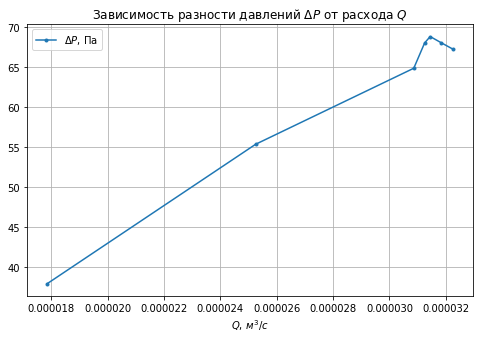

In [4]:
data = pd.read_table('1t-ht.tsv')
Δvolume = 0.5 * 0.001
frame = pd.DataFrame({'$ΔP$, Па': mm_to_Pa(data['hh'] - data['hl']), '$Q$, $м^3/с$': Δvolume / data['dt']});
plot = frame.plot(title='Зависимость разности давлений $ΔP$ от расхода $Q$', x='$Q$, $м^3/с$', figsize=(8,5), grid=True, style='.-')

t1_frame = frame

In [5]:
data

,hh,hl,dt
0,27.3,22.5,28.0
1,27.4,20.4,19.8
2,27.5,19.3,16.2
3,27.5,18.9,16.0
4,27.5,18.8,15.9
5,27.5,18.9,15.7
6,27.4,18.9,15.5


In [6]:
frame

,"$ΔP$, Па","$Q$, $м^3/с$"
0,37.952928,0.000018
1,55.348020,0.000025
2,64.836252,0.000031
3,67.998996,0.000031
4,68.789682,0.000031
5,67.998996,0.000032
6,67.208310,0.000032


### Трубка 2

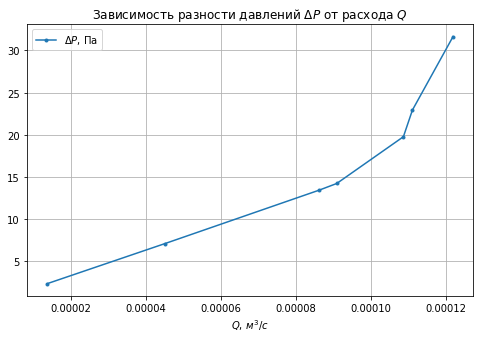

In [7]:
data = pd.read_table('2t-ht.tsv')
Δvolume = 0.5 * 0.001
frame = pd.DataFrame({'$ΔP$, Па': mm_to_Pa(data['hh'] - data['hl']), '$Q$, $м^3/с$': Δvolume / data['dt']});
plot = frame.plot(title='Зависимость разности давлений $ΔP$ от расхода $Q$', x='$Q$, $м^3/с$', figsize=(8,5), grid=True, style='.-')

t2_frame = frame

In [8]:
data

,hh,hl,dt
0,27.1,26.8,36.7
1,27.2,26.3,11.1
2,27.4,25.7,5.8
3,27.4,25.6,5.5
4,27.6,25.1,4.6
5,27.7,24.8,4.5
6,28.0,24.0,4.1


In [9]:
frame

,"$ΔP$, Па","$Q$, $м^3/с$"
0,2.372058,0.000014
1,7.116174,0.000045
2,13.441662,0.000086
3,14.232348,0.000091
4,19.767150,0.000109
5,22.929894,0.000111
6,31.627440,0.000122


## 8. $\Delta P = f(L)$ 

### Трубка 1

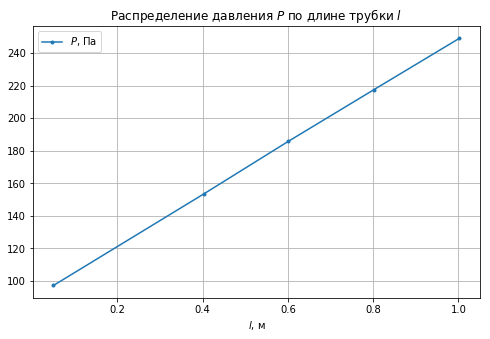

In [10]:
Δvolume = 0.5 * 0.001
Δtime = Δtime1
Q = Δvolume / Δtime1

data = pd.read_table('1t-lh.tsv')

frame = pd.DataFrame({'$P$, Па': mm_to_Pa(data['hh']), '$l$, м': data['dl'].cumsum() / 100});
plot = frame.plot(title='Распределение давления $P$ по длине трубки $l$', x='$l$, м', figsize=(8,5), grid=True, style='.-')

t1_frame_2 = frame

In [11]:
data

,dl,hh,hl
0,5.0,12.3,11.2
1,35.2,19.4,12.3
2,19.9,23.5,19.4
3,20.0,27.5,23.5
4,20.1,31.5,27.5


In [12]:
frame

,"$P$, Па","$l$, м"
0,97.254378,0.050
1,153.393084,0.402
2,185.811210,0.601
3,217.438650,0.801
4,249.066090,1.002


### Трубка 2

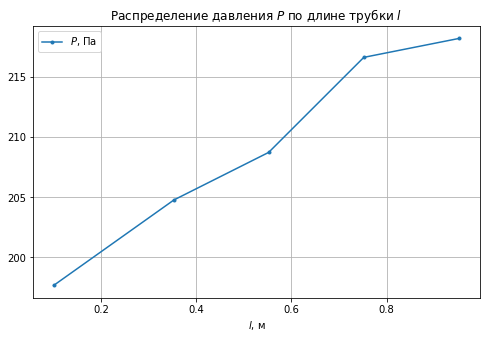

In [13]:
Δvolume = 1 * 0.001 # литров
Δtime = Δtime2
Q = Δvolume / Δtime1

data = pd.read_table('2t-lh.tsv')

frame = pd.DataFrame({'$P$, Па': mm_to_Pa(data['hh']), '$l$, м': data['dl'].cumsum() / 100});
plot = frame.plot(title='Распределение давления $P$ по длине трубки $l$', x='$l$, м', figsize=(8,5), grid=True, style='.-')

t2_frame_2 = frame

In [14]:
data

,dl,hh,hl
0,10.0,25.0,24.6
1,25.3,25.9,25.0
2,19.9,26.4,25.9
3,20.0,27.4,26.4
4,20.1,27.6,27.4


In [15]:
frame

,"$P$, Па","$l$, м"
0,197.671500,0.100
1,204.787674,0.353
2,208.741104,0.552
3,216.647964,0.752
4,218.229336,0.953


## 6. Вязкость $\eta$ из углового коэффициента линейной части зависимости $\Delta P = f(Q)$

### Трубка 1

In [16]:
linear_frame = t1_frame[:3]
a, b, sigma_a, sigma_b = lsm(linear_frame['$Q$, $м^3/с$'], linear_frame['$ΔP$, Па'])
print('Уравнение линейной части: ΔP = {} + {} * Q'.format(fmt(a, sigma_a), fmt(b, sigma_b)))

Уравнение линейной части: ΔP = 1.385253±0.000003 + 2081565±107479 * Q


Константой $a$ можно пренебречь, тогда $Q = \frac{\pi r^4}{8l\eta}\Delta P = \frac{\Delta P}{b}$.

In [17]:
l = (t1_frame_2['$l$, м'][3] - t1_frame_2['$l$, м'][1])

eta = π * rad1**4 * b / (8 * l)
print(fmt(eta, sigma_b / b * eta))

t1_eta = eta

0.0000020±0.0000001


### Трубка 2

In [18]:
linear_frame = t2_frame[:4]
a, b, sigma_a, sigma_b = lsm(linear_frame['$Q$, $м^3/с$'], linear_frame['$ΔP$, Па'])
print('Уравнение линейной части: ΔP = {} + {} * Q'.format(fmt(a, sigma_a), fmt(b, sigma_b)))

Уравнение линейной части: ΔP = 0.256356±0.000001 + 153262±573 * Q


Константой $a$ можно пренебречь, тогда $Q = \frac{\pi r^4}{8l\eta}\Delta P = \frac{\Delta P}{b}$.

In [19]:
l = (t2_frame_2['$l$, м'][3] - t2_frame_2['$l$, м'][1])

eta = π * rad2**4 * b / (8 * l)
print(fmt(eta, sigma_b / b * eta))

t2_eta = eta

0.00000241±0.00000001


## 7. $Re$ для переходной области

### Трубка 1

In [20]:
Re = t1_frame['$Q$, $м^3/с$'][2] / (π * rad1) * rho / t1_eta
print(Re)

5777.061289197868


### Трубка 2

In [21]:
Re = t2_frame['$Q$, $м^3/с$'][3] / (π * rad2) * rho / t2_eta
print(Re)

7222.136035561324


## 9. $Q = f(P)$ в двойном логарифмическом масштабе

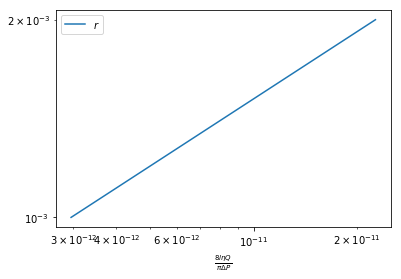

In [22]:
frame = pd.DataFrame({
    r'$\frac{8l\eta Q}{\pi\Delta P}$': pd.Series([
        8 * t1_frame_2['$l$, м'][4] * eta * t1_frame['$Q$, $м^3/с$'][6] / (π * t1_frame[r'$ΔP$, Па'][6]),
        8 * t2_frame_2['$l$, м'][4] * eta * t2_frame['$Q$, $м^3/с$'][6] / (π * t2_frame[r'$ΔP$, Па'][6])
    ]),
    '$r$': pd.Series([rad1, rad2])
})

frame.plot(loglog=True, x=r'$\frac{8l\eta Q}{\pi\Delta P}$');

Теоретически, тангенс угла наклона должен равняться $4$:

In [23]:
(np.log(frame[r'$\frac{8l\eta Q}{\pi\Delta P}$'][1] - frame[r'$\frac{8l\eta Q}{\pi\Delta P}$'][0])) / np.log(frame['$r$'][1] - frame['$r$'][0])

3.569041217148144